# Run sorters

In [1]:
import spikeinterface.full as si
from pathlib import Path

In [ ]:
si.set_global_job_kwargs(n_jobs=-1, chunk_duration="1s", progress_bar=True)

In [19]:
base_folder = Path('/data_local/DataSpikeSorting/data_milan_2025')
rec_name = "M25_D23_2024-11-11_13-11-10_OF1"
oe_folder = base_folder / rec_name
full_raw_rec = si.read_openephys(oe_folder)
full_raw_rec

OpenEphysBinaryRecordingExtractor: 384 channels - 30.0kHz - 1 segments - 29,363,947 samples 
                                   978.80s (16.31 minutes) - int16 dtype - 21.00 GiB

### Reload previous preprocessing

In [4]:
preprocess_folder = base_folder / f"{rec_name}_preprocessed"
if not preprocess_folder.is_dir():
    # in case the preprocessing is not done
    # lets do a quick one
    recording_f = si.bandpass_filter(full_raw_rec, freq_min=300, freq_max=9000)
    recording_cmr = si.common_reference(recording_f, reference='global', operator='median')
    rec_preprocessed = recording_cmr
    print(rec_preprocessed)    
    recording_saved = rec_preprocessed.save(folder=preprocess_folder)
recording_saved = si.load(preprocess_folder)
recording_saved

BinaryFolderRecording: 384 channels - 30.0kHz - 1 segments - 29,363,947 samples 
                       978.80s (16.31 minutes) - int16 dtype - 21.00 GiB

In [1]:
# %matplotlib widget
# si.plot_traces(recording_saved, backend="ipywidgets")

### Check installation

We can now run spike sorting on the above recording. We will use different spike sorters for this demonstration, to show how easy SpikeInterface makes it easy to interchengably run different sorters :)

Let's first check the available and installed sorters in `SpikeInterface`.
We will sort the bandpass cached filtered recording the `recording_saved` object.

In [21]:
si.available_sorters()

['combinato',
 'hdsort',
 'herdingspikes',
 'ironclust',
 'kilosort',
 'kilosort2',
 'kilosort2_5',
 'kilosort3',
 'kilosort4',
 'kilosort4like',
 'mountainsort4',
 'mountainsort5',
 'pykilosort',
 'rtsort',
 'simple',
 'spykingcircus',
 'spykingcircus2',
 'tridesclous',
 'tridesclous2',
 'waveclus',
 'waveclus_snippets',
 'yass']

In [23]:
si.installed_sorters()

['kilosort4', 'kilosort4like', 'simple', 'spykingcircus2', 'tridesclous2']

The `spikeinterface.sortingcomponents` module includes functions that can be used to create custom spike sorting pipelines built-in in `SpikeInterface`. It is still experimental and under heavy development, but there are already 3  SI-based sorters available:

* `tridesclous2` (developed by Samuel Garcia)
* `spykingcircus2` (developed by Pierre Yger)
* `simple` which is only for demo and teaching

They can be run with the same `run_sorter` function, but they don't require any additional installation!

In [24]:
si.run_sorter?

Signature:
si.run_sorter(
    sorter_name: 'str',
    recording: 'BaseRecording | dict',
    folder: 'Optional[str]' = None,
    remove_existing_folder: 'bool' = False,
    delete_output_folder: 'bool' = False,
    verbose: 'bool' = False,
    raise_error: 'bool' = True,
    docker_image: 'Optional[Union[bool, str]]' = False,
    singularity_image: 'Optional[Union[bool, str]]' = False,
    delete_container_files: 'bool' = True,
    with_output: 'bool' = True,
    **sorter_params,
)
Docstring:
Generic function to run a sorter via function approach.

Parameters
----------
sorter_name : str
    The sorter name
recording : RecordingExtractor | dict of RecordingExtractor
    The recording extractor to be spike sorted
folder : str or Path
    Path to output folder
remove_existing_folder : bool
    If True and folder exists then delete.
delete_output_folder : bool, default: False
    If True, output folder is deleted
verbose : bool, default: False
    If True, output is verbose
raise_error : 

In [26]:
si.get_default_sorter_params('kilosort4')

{'fs': 30000,
 'batch_size': 60000,
 'nblocks': 1,
 'Th_universal': 9,
 'Th_learned': 8,
 'nt': 61,
 'shift': None,
 'scale': None,
 'artifact_threshold': inf,
 'nskip': 25,
 'whitening_range': 32,
 'highpass_cutoff': 300,
 'binning_depth': 5,
 'sig_interp': 20,
 'drift_smoothing': [0.5, 0.5, 0.5],
 'nt0min': None,
 'dmin': None,
 'dminx': 32,
 'min_template_size': 10,
 'template_sizes': 5,
 'nearest_chans': 10,
 'nearest_templates': 100,
 'max_channel_distance': 32,
 'max_peels': 100,
 'templates_from_data': True,
 'n_templates': 6,
 'n_pcs': 6,
 'Th_single_ch': 6,
 'acg_threshold': 0.2,
 'ccg_threshold': 0.25,
 'cluster_neighbors': 10,
 'cluster_downsampling': 20,
 'max_cluster_subset': None,
 'x_centers': None,
 'duplicate_spike_ms': 0.25,
 'position_limit': 100,
 'do_CAR': True,
 'invert_sign': False,
 'save_extra_vars': False,
 'save_preprocessed_copy': False,
 'torch_device': 'auto',
 'bad_channels': None,
 'clear_cache': False,
 'do_correction': True,
 'skip_kilosort_preprocessi

### Run sorter installed locally

This run a sorter which is installed in the current python environements.

In [27]:
sorter_params = {'do_correction': False}

In [30]:
sorting_KS4 = si.run_sorter('kilosort4', recording_saved,
                             folder=base_folder / f'{rec_name}_sorter_KS4',
                             verbose=True, **sorter_params)

kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 29363947
kilosort.run_kilosort: N seconds: 978.7982333333333
kilosort.run_kilosort: N batches: 490
kilosort.run_kilosort: Preprocessing filters computed in 3.98s; total 3.98s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     3.40 %
kilosort.run_kilosort: Mem used:     11.80 %     |       7.37 GB
kilosort.run_kilosort: Mem avail:    55.17 / 62.54 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   24.39 %     |      1.90   /     7.79 GB
kilosort.run_kilosort: Allocated:     0.11 %     |      0.01   /     7.79 GB
kilosort.ru

Skipping drift correction.


kilosort.spikedetect: Number of universal templates: 1149
kilosort.spikedetect: Detecting spikes...
100%|██████████| 490/490 [05:48<00:00,  1.41it/s]
kilosort.run_kilosort: 1718316 spikes extracted in 353.05s; total 357.19s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after spike detect (univ)
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     0.00 %
kilosort.run_kilosort: Mem used:     15.00 %     |       9.41 GB
kilosort.run_kilosort: Mem avail:    53.13 / 62.54 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   58.40 %     |      4.55   /     7.79 GB
kilosort.run_kilosort: Allocated:     0.13 %     |      0.01   /     7.79 GB
kilosort.run_kilosort: Max alloc:    33.84 %     |      2.64   /     7.79 GB
kilosort.run_kilosort: *************************************

kilosort4 run time 656.55s


/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/basesorting.py:316: UserWarning: Some spikes exceed the recording's duration! Removing these excess spikes with `spikeinterface.curation.remove_excess_spikes()` Might be necessary for further postprocessing.
  warnings.warn(


In [23]:
sorting_KS4 = si.load(base_folder / f'{rec_name}_sorter_KS4')
sorting_KS4 = si.remove_excess_spikes(sorting_KS4, recording_saved)
sorting_KS4

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/basesorting.py:316: UserWarning: Some spikes exceed the recording's duration! Removing these excess spikes with `spikeinterface.curation.remove_excess_spikes()` Might be necessary for further postprocessing.
  warnings.warn(


RemoveExcessSpikesSorting: 330 units - 1 segments - 30.0kHz

## Run a spikeinterface builtin sorters

This run a sorter which is spikeinterface *'builtin'* : `tridesclous2` or `spykingcircus`
Some of theses sorter can requires some extra dependencies like `hdbscan`

In [37]:
si.get_default_sorter_params('tridesclous2')

{'apply_preprocessing': True,
 'apply_motion_correction': False,
 'motion_correction': {'preset': 'dredge_fast'},
 'cache_preprocessing': {'mode': 'memory',
  'memory_limit': 0.5,
  'delete_cache': True},
 'waveforms': {'ms_before': 0.5, 'ms_after': 1.5, 'radius_um': 120.0},
 'filtering': {'freq_min': 150.0,
  'freq_max': 5000.0,
  'ftype': 'bessel',
  'filter_order': 2},
 'detection': {'peak_sign': 'neg',
  'detect_threshold': 5,
  'exclude_sweep_ms': 1.5,
  'radius_um': 150.0},
 'selection': {'n_peaks_per_channel': 5000, 'min_n_peaks': 20000},
 'svd': {'n_components': 4},
 'clustering': {'recursive_depth': 5,
  'split_radius_um': 40.0,
  'clusterer': 'isosplit',
  'clusterer_kwargs': {'n_init': 50,
   'min_cluster_size': 10,
   'max_iterations_per_pass': 500,
   'isocut_threshold': 2.0},
  'do_merge': True,
  'merge_kwargs': {'similarity_metric': 'l1',
   'num_shifts': 4,
   'similarity_thresh': 0.75},
  'min_size_split': 25},
 'templates': {'ms_before': 2.0,
  'ms_after': 3.0,
  'ma

In [39]:
sorter_params = {
    "apply_motion_correction": False,
    
}

sorting_TDC2 = si.run_sorter('tridesclous2', recording_saved,
                             folder=base_folder / f'{rec_name}_sorter_TDC2',
                             verbose=True, **sorter_params)

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/tools.py:378: UserWarning: Recording too large to be preloaded in RAM...
  warnings.warn("Recording too large to be preloaded in RAM...")


detect peaks using locally_exclusive (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

detect_peaks(): 903748 peaks found
select_peaks(): 903748 peaks kept for clustering


Fit peaks svd (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

Transform peaks svd (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/clustering/isosplit_isocut.py:287: UserWarning: isosplit : n_init 50 is too big compared to sample size 302 and min_cluster_size 10
  warnings.warn(
/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/clustering/isosplit_isocut.py:287: UserWarning: isosplit : n_init 50 is too big compared to sample size 224 and min_cluster_size 10
  warnings.warn(
/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/clustering/isosplit_isocut.py:287: UserWarning: isosplit : n_init 50 is too big compared to sample size 127 and min_cluster_size 10
  warnings.warn(
/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/clustering/isosplit_isocut.py:287: UserWarning: isosplit : n_init 50 is too big compared to sample size 186 and min_cluster_size 10
  warnings.warn(
/home/samuel.gar

split_clusters with local_feature_clustering:   0%|          | 0/384 [00:00<?, ?it/s]

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/clustering/isosplit_isocut.py:287: UserWarning: isosplit : n_init 50 is too big compared to sample size 380 and min_cluster_size 10
  warnings.warn(
/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/clustering/isosplit_isocut.py:287: UserWarning: isosplit : n_init 50 is too big compared to sample size 206 and min_cluster_size 10
  warnings.warn(
/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/clustering/isosplit_isocut.py:287: UserWarning: isosplit : n_init 50 is too big compared to sample size 309 and min_cluster_size 10
  warnings.warn(
/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/clustering/isosplit_isocut.py:287: UserWarning: isosplit : n_init 50 is too big compared to sample size 318 and min_cluster_size 10
  warnings.warn(
/home/samuel.gar

find_cluster_from_peaks(): 107 cluster found


estimate_templates_with_accumulator (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

find spikes (tdc-peeler) (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

tridesclous2 run time 359.72s


In [6]:
sorting_TDC2 = si.load(base_folder / f'{rec_name}_sorter_TDC2')
sorting_TDC2

NumpyFolder (NumpyFolderSorting): 107 units - 1 segments - 30.0kHz

In [26]:
si.set_global_job_kwargs(n_jobs=30, chunk_duration="0.2s", progress_bar=True)

sorter_params = {
    "apply_motion_correction": False,
    
}

sorting_SC2 = si.run_sorter('spykingcircus2', recording_saved,
                             folder=base_folder / f'{rec_name}_sorter_SC2',
                             verbose=True, **sorter_params)

Preprocessing the recording (bandpass filtering + CMR + whitening)


noise_level (workers: 20 processes):   0%|          | 0/20 [00:00<?, ?it/s]

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/tools.py:378: UserWarning: Recording too large to be preloaded in RAM...
  warnings.warn("Recording too large to be preloaded in RAM...")


detect peaks using locally_exclusive + 1 node (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s…

detect peaks using matched_filtering (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

Kept 1178773 peaks for clustering


Transform peaks svd (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/384 [00:00<?, ?it/s]

Kept 371 raw clusters
Kept 162 clean clusters


find spikes (circus-omp-svd) (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

Found 2027908 spikes
Kept 159 units after final merging
spykingcircus2 run time 863.96s


In [27]:
sorting_SC2 = si.load(base_folder / f'{rec_name}_sorter_SC2')
sorting_SC2

NumpyFolder (NumpyFolderSorting): 159 units - 1 segments - 30.0kHz

### Run sorter in container

Some sorters are hard to install! To alleviate this headache, SI provides a built-in mechanism to run a spike sorting job in a docker container.

We are maintaining a set of sorter-specific docker files in the [spikeinterface-dockerfiles repo](<https://github.com/SpikeInterface/spikeinterface-dockerfiles>)
and most of the docker images are available on Docker Hub from the [SpikeInterface organization](<https://hub.docker.com/orgs/spikeinterface/repositories>).

Running spike sorting in a docker container just requires to:

1. have docker/singularity installed
2. have docker/singularity python SDK installed (`pip install docker/spython`)

When docker/singularity is installed, you can simply run the sorter in a container image:



In [9]:
sorter_params = {'do_correction': False}
sorting_KS25 = si.run_sorter('kilosort2_5', recording_saved, 
                            folder=base_folder /  f'{rec_name}_sorter_KS25',
                            verbose=True,
                            singularity_image=True, 
                            **sorter_params
                            )


installation_mode='auto' switching to installation_mode: 'dev'
Starting container
Installing spikeinterface with folder in container
Running kilosort2_5 sorter inside spikeinterface/kilosort2_5-compiled-base
Stopping container


/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.103.1 is recommended
  warnings.warn(


In [24]:
sorting_KS25 = si.load(base_folder / f'{rec_name}_sorter_KS25')
sorting_KS25 = si.remove_excess_spikes(sorting_KS25, recording_saved)
sorting_KS25

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.103.1 is recommended
  warnings.warn(


KiloSortSortingExtractor: 265 units - 1 segments - 30.0kHz

## Using the Sorting object

### compare sorter outputs

In [2]:
# comp = si.compare_two_sorters(sorting_KS4, sorting_TDC2, 'KS4', 'TDC2')
# comp = si.compare_two_sorters(sorting_KS4, sorting_KS25, 'KS4', 'KS25')
# comp = si.compare_two_sorters(sorting_SC2, sorting_TDC2, 'SC2', 'TDC2')
comp = si.compare_two_sorters(sorting_SC2, sorting_KS4, 'SC2', 'KS4')

NameError: name 'si' is not defined

In [3]:
w = si.plot_agreement_matrix(comp)

NameError: name 'si' is not defined

In [30]:
multi_comp = si.compare_multiple_sorters(
    sorting_list=[sorting_KS4, sorting_TDC2, sorting_KS25, sorting_SC2],
    name_list=['KS4', 'TDC2', 'KS25', 'SC2'],
    spiketrain_mode='union',
    verbose=True
)

Multicomparison step 1: pairwise comparison
Multicomparison step 2: make graph
Multicomparison step 3: clean graph
Removed edge: [('KS4', 98) ('SC2', 353) {'weight': 0.5013188518231187}]
Removed node: ('KS4', 98)
Removed 1 duplicate nodes
Multicomparison step 4: extract agreement from graph


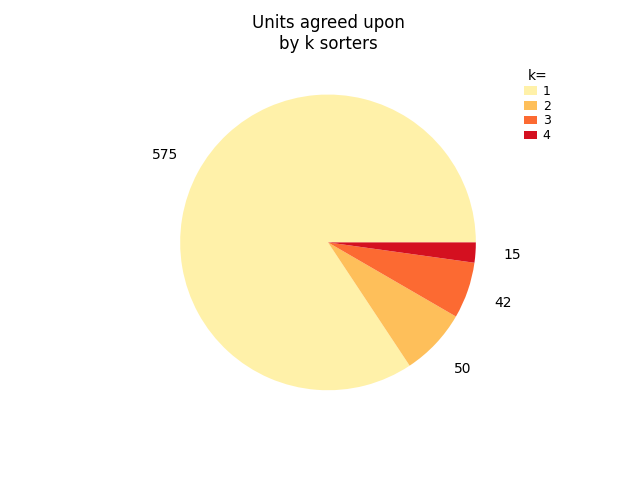

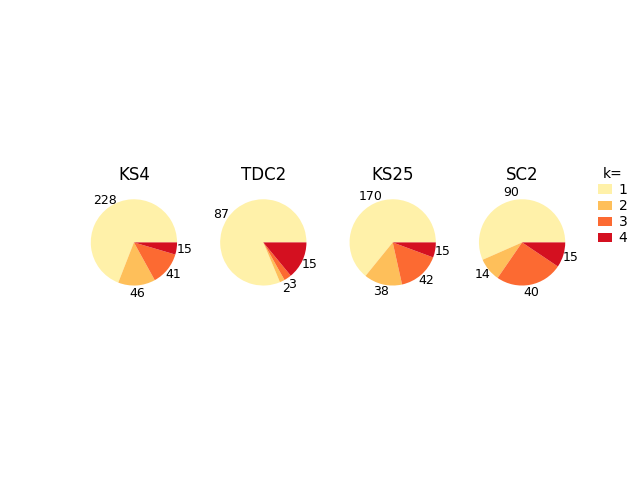

In [31]:
w = si.plot_multicomparison_agreement(multi_comp)
w = si.plot_multicomparison_agreement_by_sorter(multi_comp)

## debug

In [25]:
analyzer = si.create_sorting_analyzer(
    sorting_KS4, recording_saved,
    format="binary_folder",
    folder=base_folder / f'{rec_name}_analyzer_KS4'
)
analyzer.compute("random_spikes", method="uniform", max_spikes_per_unit=500)
analyzer.compute("waveforms")
analyzer.compute("templates")
analyzer.compute("noise_levels")
analyzer.compute("unit_locations")
analyzer.compute("isi_histograms", window_ms=50., bin_ms=1., method="numba")
analyzer.compute("correlograms", window_ms=50., bin_ms=1.)
analyzer.compute("template_similarity", method="l2")
# analyzer.compute("principal_components", n_components=3, mode='by_channel_global', whiten=True)
analyzer.compute("quality_metrics", metric_names=["snr", "firing_rate"])
analyzer.compute("spike_amplitudes")


estimate_sparsity (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/basesorting.py:380: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


compute_waveforms (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

spike_amplitudes (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

In [22]:
analyzer = si.create_sorting_analyzer(
    sorting_TDC2, recording_saved,
    format="binary_folder",
    folder=base_folder / f'{rec_name}_analyzer_TDC2'
)
analyzer.compute("random_spikes", method="uniform", max_spikes_per_unit=500)
analyzer.compute("waveforms")
analyzer.compute("templates")
analyzer.compute("noise_levels")
analyzer.compute("unit_locations")
analyzer.compute("isi_histograms", window_ms=50., bin_ms=1., method="numba")
analyzer.compute("correlograms", window_ms=50., bin_ms=1.)
analyzer.compute("template_similarity", method="l2")
analyzer.compute("principal_components", n_components=3, mode='by_channel_global', whiten=True)
analyzer.compute("quality_metrics", metric_names=["snr", "firing_rate"])
analyzer.compute("spike_amplitudes")

estimate_sparsity (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/basesorting.py:380: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


compute_waveforms (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/107 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/107 [00:00<?, ?it/s]

spike_amplitudes (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

In [32]:
analyzer = si.create_sorting_analyzer(
    sorting_SC2, recording_saved,
    format="binary_folder",
    folder=base_folder / f'{rec_name}_analyzer_SC2'
)
analyzer.compute("random_spikes", method="uniform", max_spikes_per_unit=500)
analyzer.compute("waveforms")
analyzer.compute("templates")
analyzer.compute("noise_levels")
analyzer.compute("unit_locations")
analyzer.compute("isi_histograms", window_ms=50., bin_ms=1., method="numba")
analyzer.compute("correlograms", window_ms=50., bin_ms=1.)
analyzer.compute("template_similarity", method="l2")
analyzer.compute("principal_components", n_components=3, mode='by_channel_global', whiten=True)
analyzer.compute("quality_metrics", metric_names=["snr", "firing_rate"])
analyzer.compute("spike_amplitudes")

estimate_sparsity (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/basesorting.py:380: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


compute_waveforms (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/159 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/159 [00:00<?, ?it/s]

spike_amplitudes (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]